In [1]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model

2023-10-18 22:21:06.781929: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 22:21:06.783638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 22:21:06.807514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-18 22:21:06.807539: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-18 22:21:06.807556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Image normalization
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [3]:
IMG_SIZE = (224, 224)

In [4]:
# Set directories
root_dir = os.getcwd()
test_dir = os.path.join(root_dir, "test-dataset")

In [5]:
IMG_SHAPE = IMG_SIZE + (3,)
model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                               )

In [6]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [7]:
outputs = [layer.output for layer in model.layers[1:7]]

In [8]:
model = Model(inputs=model.inputs, outputs=outputs)

1/1 [==============================] - 0s 62ms/step


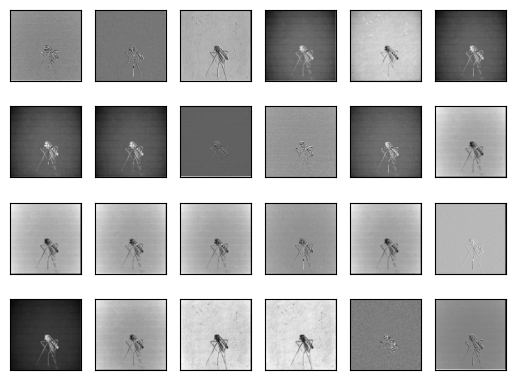

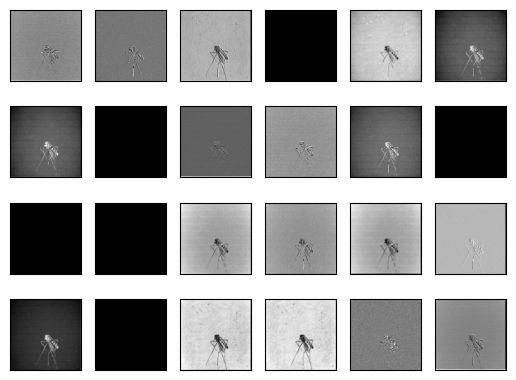

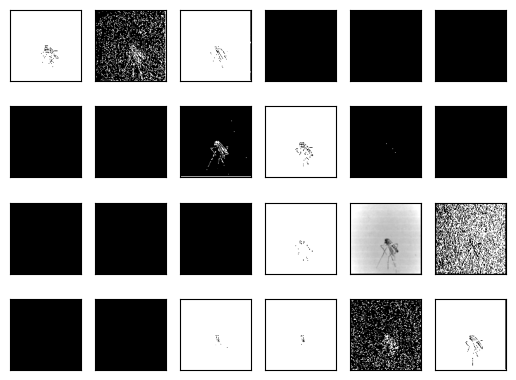

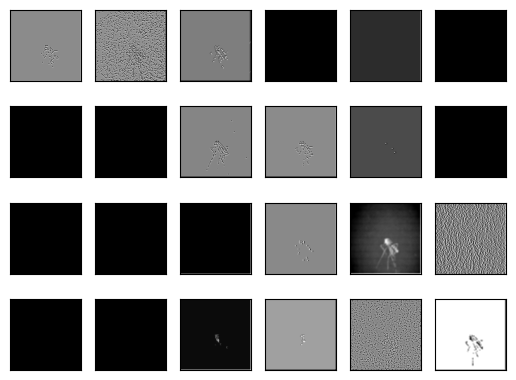

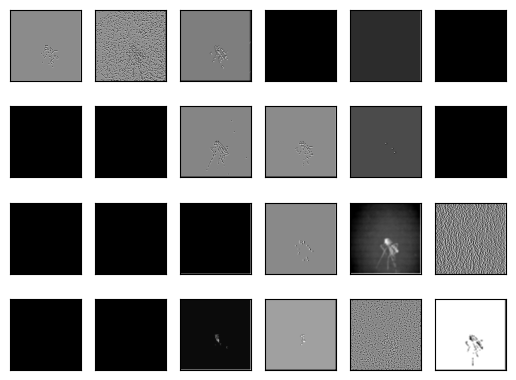

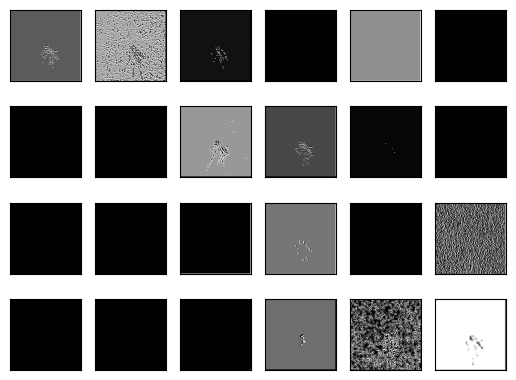

In [9]:
img = cv2.imread(os.path.join(test_dir, "aegypti1a.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = tf.image.resize(img, IMG_SIZE)

yhat = model.predict(np.expand_dims(img, 0))
""" yhat = tf.nn.sigmoid(yhat[0])
yhat = tf.where(yhat < 0.5, 0, 1)
yhat = np.array(yhat) """

for fmap in yhat:
	ix = 1
	for _ in range(4):
		for _ in range(6):
			ax = plt.subplot(4, 6, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()